In [80]:
# import the librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
#Loading the dataset
df=pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Data Preprocessing

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [83]:
#Dropping id column which is same as index column
df.drop(['ID'], axis=1, inplace=True)

In [84]:
df['Reached.on.Time_Y.N']=df['Reached.on.Time_Y.N'].astype('object')

In [85]:
# checking duplicates
df.duplicated().sum()

0

In [86]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [87]:
df.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender,Reached.on.Time_Y.N
count,10999,10999,10999,10999,10999
unique,5,3,3,2,2
top,F,Ship,low,F,1
freq,3666,7462,5297,5545,6563


# EDA

In [88]:
df1=df.copy()

In [89]:
df1.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [90]:
df1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


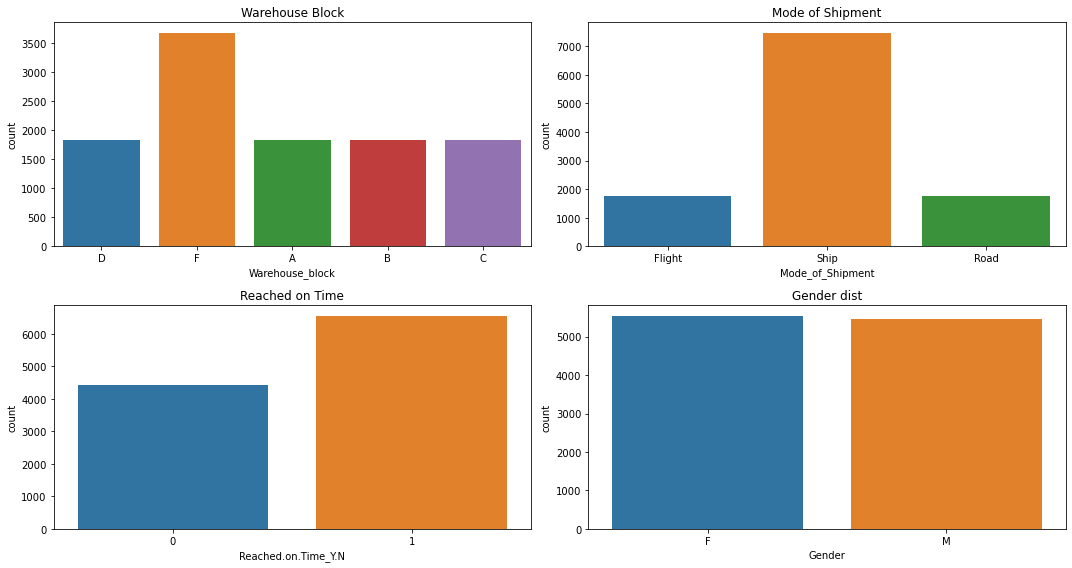

In [91]:
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.countplot(x = 'Warehouse_block', data = df1, ax=ax[0,0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df1, ax=ax[0,1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df1, ax=ax[1,0]).set_title('Reached on Time')
sns.countplot(x='Gender',data=df1,ax=ax[1,1]).set_title('Gender dist')
plt.tight_layout()
plt.show()

From the first graph, we can see that the number of products from warehouse F is most i.e. 3500, whereas rest of them have nearly equal number of products. The second graph is about the shipment of the product, where majority of the products are shipped via Ship. Third graph is about the timely delivery of the product where the number of products delivered on time is more than the number of products not delivered on time. from the fourth graph we can say the male and female customers are almost equal.

Text(0.5, 1.0, 'Prior Purchases')

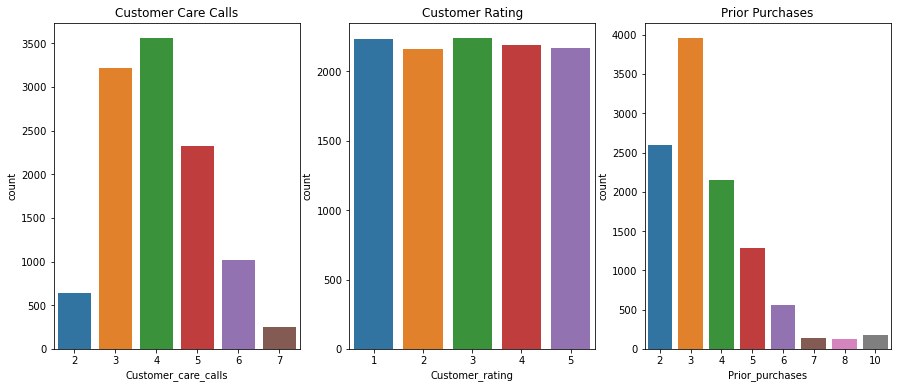

In [92]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
sns.countplot(x = 'Customer_care_calls', data = df1, ax=ax[0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df1, ax=ax[1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df1, ax=ax[2]).set_title('Prior Purchases')


The first graph shows the number of customer care calls done by the customers, where we can see that majority of the customers have done 3 to 4 calls which shows customers could be facing some issues with product delivery.
In the second graph, we can see that the count of customer ratings across all ratings is same which shows inconsistent service quality, where some customers have excellent experience while others face major issues.
The third graph is about the prior purchases done by the customers, where we can see the no.of prior purchases done by the customers ranges from 2 to 10, but the max concentration is around 2 to 4 it shows that most customers have only made few purchases,which indicate many customers are first-time or occasional buyers rather than loyal, repeat customers.so customers are not satisfied with the service or product quality. 

In [93]:
df1[df1['Prior_purchases']>4].shape[0]

2290

In [94]:
df1[df1['Prior_purchases']<4].shape[0]

6554

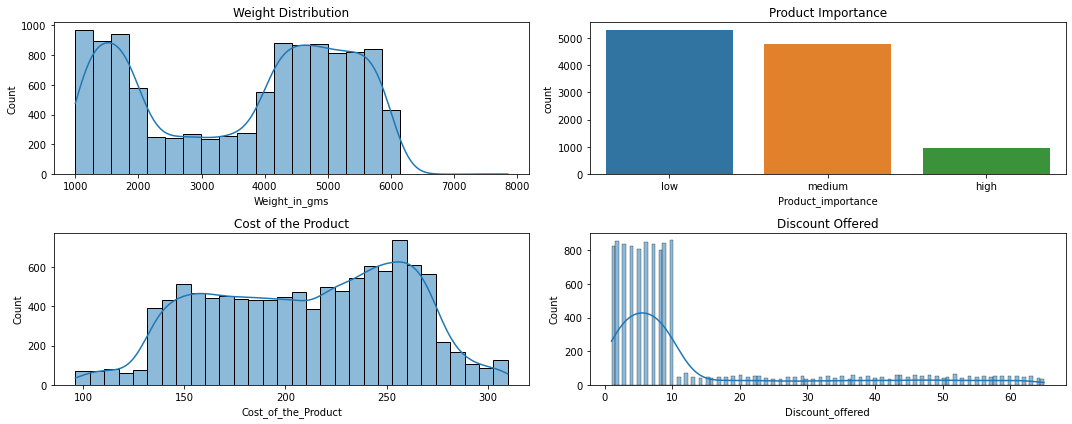

In [95]:
fig, ax = plt.subplots(2,2,figsize=(15,6))
sns.histplot(df['Weight_in_gms'], ax=ax[0,0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[0,1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[1,0], kde=True).set_title('Cost of the Product')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')
plt.tight_layout()
plt.show()

The first graph shows products weight dist, the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the products in these weight ranges. The second graph is about the product importance, where majority of the products have low or medium importance. Third graph is about the cost dist of the products, where most of products range between 140 to 275 dollars.The fourth graph is about the discount offered on the products, where we can see that majority of the products have 0-10% discount, which means that the company is not offering much discount on the products.

Text(0.5, 1.0, 'Discount_offered')

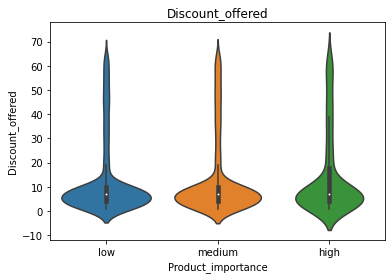

In [96]:
sns.violinplot(x = df1['Product_importance'],y = df1['Discount_offered'], kde=True).set_title('Discount_offered')

from this graph we can see the company is offering higher discounts for low and medium importance products and lower discounts for higher importance products.

Text(0.5, 1.0, 'Cost of the Product')

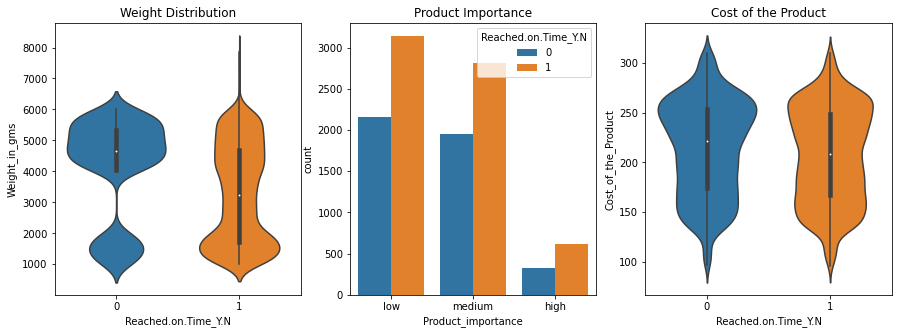

In [97]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(x = df1['Reached.on.Time_Y.N'],y = df1['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(x = df1['Reached.on.Time_Y.N'],y = df1['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

From the first graph, Products that weight more than 4500 grams are tend to be delayed and products that weight between 2500 - 3500 grams have a better chance of delivered timely. The second graph is about the product importance and product delivery, where we can see that there is no major difference between the product delivery based on the product importance. The third graph shows the relationship between the cost of the product and product delivery, where we can see that products that cost more than 250 have higher count of not delivered on time.

Text(0.5, 1.0, 'Mode of Shipment')

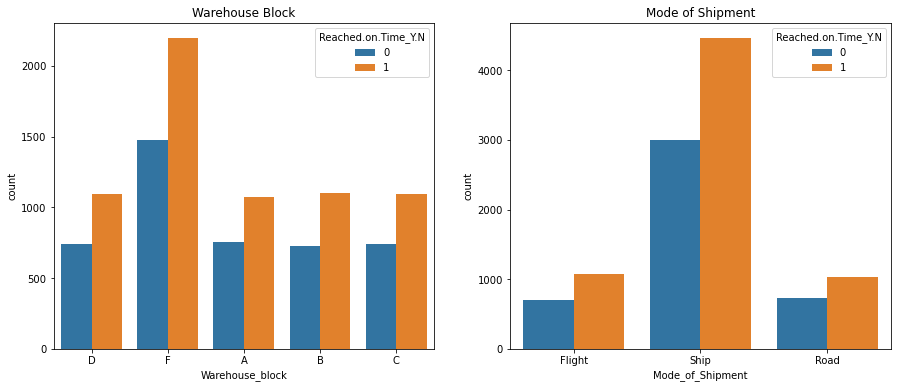

In [98]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(x = 'Warehouse_block', data = df1, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df1, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

In [118]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


<AxesSubplot:>

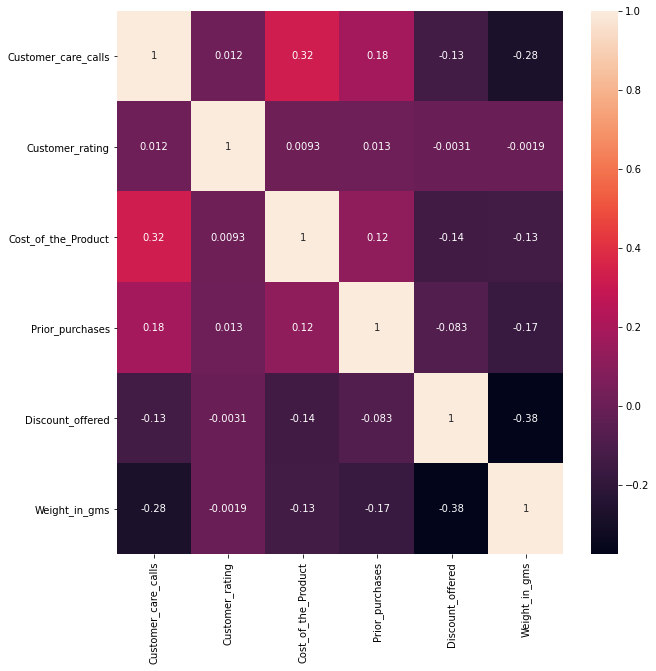

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)

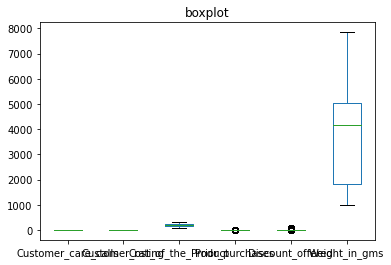

In [121]:
# outlier detection
ax = df1.select_dtypes(include=['number']).plot(kind='box', title='boxplot')

# Display the plot
plt.show()                     

In [104]:
df1.head(2)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1


In [105]:
x=df1.drop(columns=['Reached.on.Time_Y.N'])
y=df1['Reached.on.Time_Y.N']

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [107]:
print(df1.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10999, 11)
(8799, 10)
(2200, 10)
(8799,)
(2200,)


### Encoding

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


In [116]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


# Ordinalencoding 
oe = OrdinalEncoder()
x_train_ord = oe.fit_transform(x_train[['Product_importance']])

# also the test data
x_test_ord = oe.fit_transform(x_test[['Product_importance']])

print(x_train_ord.shape)

# OneHotEncoding 
ohe = OneHotEncoder(drop='first',sparse=False)
x_train_nom = ohe.fit_transform(x_train[['Warehouse_block','Mode_of_Shipment','Gender']])

# also the test data
x_test_nom = ohe.fit_transform(x_test[['Warehouse_block','Mode_of_Shipment','Gender']])

print(x_train_nom.shape)

x_train_transformed = np.concatenate((x_train_ord,x_train_nom,x_train[['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]),axis=1)
# also the test data
x_test_transformed = np.concatenate((x_test_ord,x_test_nom,x_test[['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']]),axis=1)

print(x_train_transformed.shape)

# label encoding
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

print(y_train.shape)


(8799, 1)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(8799, 7)
(8799, 14)
(8799,)


### Model building

#### Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [137]:
import time
#gridsearchcv
start = time.time()

param_dist = {'max_depth': [4,5,6,7],
              'min_samples_split': [1,2,3],
              'min_samples_leaf':[6,7,8],
              
              'criterion': ['gini','entropy']
              }
#GridSearchCV object
grid = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
#Fitting the model
grid.fit(x_train_transformed, y_train)

print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()

print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}
Time taken in grid search:  6.44


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\util

In [150]:
# DecisionTree
model_dt = DecisionTreeClassifier(random_state=1, max_depth=7,min_samples_split=7,min_samples_leaf=6,criterion='entropy')
model_dt.fit(x_train_transformed, y_train)
model_dt_score_train = model_dt.score(x_train_transformed, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test_transformed, y_test)
print("Testing score: ",model_dt_score_test)


Training score:  0.6954199340834186
Testing score:  0.6940909090909091


In [151]:
#performance metrics

y_pred_dt=model_dt.predict(x_test_transformed)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("AUC:",roc_auc_dt)

AUC: 0.7366251002171227


#### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [161]:


#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#GridSearchCV object
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(x_train_transformed, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 42}


In [162]:
# Random Forest
model_rf = RandomForestClassifier(random_state=42, max_depth=8,min_samples_split=2,min_samples_leaf=6,criterion='entropy')
model_rf.fit(x_train_transformed, y_train)
model_rf_score_train = model_rf.score(x_train_transformed, y_train)
print("Training score: ",model_rf_score_train)
model_rf_score_test = model_rf.score(x_test_transformed, y_test)
print("Testing score: ",model_rf_score_test)


Training score:  0.7273553812933288
Testing score:  0.6909090909090909


In [163]:
#performance metrics

y_pred_rf=model_rf.predict(x_test_transformed)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("AUC:",roc_auc_rf)

AUC: 0.7300314157023456


In [156]:
from sklearn.metrics import classification_report, confusion_matrix  
print('Decision Tree Confusion matrix: \n', confusion_matrix(y_test, y_pred_dt))  
print('Decision Tree Classifier: \n', classification_report(y_test, y_pred_dt))

Decision Tree Confusion matrix: 
 [[839  43]
 [630 688]]
Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.95      0.71       882
           1       0.94      0.52      0.67      1318

    accuracy                           0.69      2200
   macro avg       0.76      0.74      0.69      2200
weighted avg       0.79      0.69      0.69      2200



In [164]:
print('Random Forest Confusion matrix: \n', confusion_matrix(y_test, y_pred_rf))  
print('Random Forest Classifier: \n', classification_report(y_test, y_pred_rf))

Random Forest Confusion matrix: 
 [[818  64]
 [616 702]]
Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.93      0.71       882
           1       0.92      0.53      0.67      1318

    accuracy                           0.69      2200
   macro avg       0.74      0.73      0.69      2200
weighted avg       0.78      0.69      0.69      2200



The Decision tree classifier and Random forest classifier giving almost same testing accuracy of 69%.